<a href="https://colab.research.google.com/github/gabriellecaillaud/APS360_Traffic_Sign_Recognition/blob/main/Baseline_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#process data
#train data
#tune hyperparamaters
#test model

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import cv2
import numpy as np

import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from datasets import load_dataset

import zipfile
from google.colab import drive

#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/APS360/Data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/drive/MyDrive/APS360/Data/') #Extracts the files into the /tmp folder
zip_ref.close()

import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/APS360/Data", output="/content/my_data/Data_split",
    seed=42, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values


# location on Google Drive
master_path = '/content/my_data/Data_split/'

# Transform Settings - Do not use RandomResizedCrop
transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor(), transforms.Grayscale()])

# assumes three folders with 60% training, 20% validation and 20% testing samples
train_dataset = torchvision.datasets.ImageFolder(master_path + 'train', transform=transform)
val_dataset = torchvision.datasets.ImageFolder(master_path + 'val', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(master_path + 'test', transform=transform)



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  1.86 files/s]
Copying files: 23 files [00:00, 47.13 files/s]
Copying files: 36 files [00:01, 24.94 files/s]
Copying files: 82 files [00:01, 72.57 files/s]
Copying files: 125 files [00:01, 120.68 files/s]
Copying files: 168 files [00:01, 170.29 files/s]
Copying files: 213 files [00:01, 222.47 files/s]
Copying files: 251 files [00:01, 255.49 files/s]
Copying files: 292 files [00:02, 290.58 files/s]
Copying files: 337 files [00:02, 328.83 files/s]
Copying files: 378 files [00:02, 343.16 files/s]
Copying files: 419 files [00:02, 356.46 files/s]
Copying files: 468 files [00:02, 392.79 files/s]
Copying files: 516 files [00:02, 416.33 files/s]
Copying files: 567 files [00:02, 442.73 files/s]
Copying files: 614 files [00:02, 407.57 files/s]
Copying files: 663 files [00:02, 429.38 files/s]
Copying files: 712 files [00:03, 444.97 files/s]
Copying files: 758 files [00:03, 351.50 files/s]
Copying files: 809 files [00:03, 38

In [73]:
train_loader = torch.utils.data.DataLoader(train_dataset)
val_loader = torch.utils.data.DataLoader(val_dataset)
test_loader = torch.utils.data.DataLoader(test_dataset)

In [38]:
print("Training dataset: " ,len(train_dataset))
print("Validation dataset: " ,len(val_dataset))
print("Testing dataset: " ,len(test_dataset))


Training dataset:  4200
Validation dataset:  525
Testing dataset:  525
(tensor([[[0.1490, 0.0941, 0.0118,  ..., 0.0196, 0.0078, 0.0000],
         [0.1176, 0.0745, 0.0118,  ..., 0.0118, 0.0039, 0.0000],
         [0.0706, 0.0471, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0902, 0.2353,  ..., 0.0118, 0.0078, 0.0078],
         [0.0000, 0.0353, 0.0902,  ..., 0.0902, 0.0824, 0.0745],
         [0.0000, 0.0000, 0.0000,  ..., 0.1412, 0.1255, 0.1137]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0392, 0.0627],
         [0.0353, 0.0549, 0.0863,  ..., 0.0039, 0.0235, 0.0392],
         [0.0902, 0.1412, 0.2235,  ..., 0.0000, 0.0039, 0.0039],
         ...,
         [0.0784, 0.0471, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0314, 0.0196, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000]],

        [[0.0000, 0.0157, 0.0431,  ..., 0.0039, 0.0392, 0.0588],
         [0.0392, 0.0549, 0.0784,  ..., 0.0314, 0.0

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


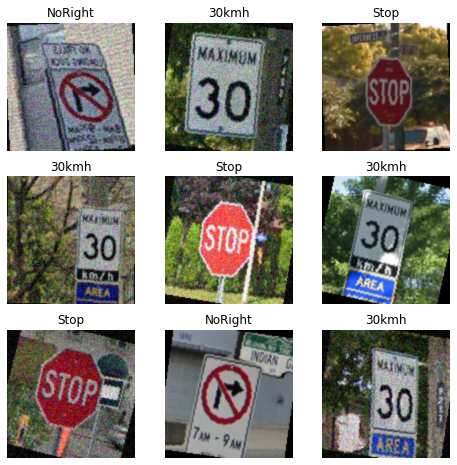

In [74]:
#visualise data

labels_map = {
    0: "30kmh",
    1: "60kmh",
    2: "ChildrenCrossing",
    3: "KeepRight",
    4: "NoRight",
    5: "Stop",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    print(img.size())
    plt.imshow(img.permute(1, 2, 0), cmap="gray")
plt.show()

In [75]:
# convert RGB images to grayscale
def grayscale(rgb_images):
    res = np.zeros(shape=(len(rgb_images), 
                          rgb_images.shape[1],
                          rgb_images.shape[2]))
    for i in range(len(rgb_images)):
        res[i] = cv2.cvtColor(rgb_images[i], cv2.COLOR_RGB2GRAY)
    return res


In [92]:
train_features, train_labels = next(iter(train_loader))

labels_map = {
    0: "30kmh",
    1: "60kmh",
    2: "ChildrenCrossing",
    3: "KeepRight",
    4: "NoRight",
    5: "Stop",
}

#grayscale(train_features[0])
#img = train_features[63].squeeze()
#label = train_labels[63]
#plt.title(label)
#plt.imshow(img.permute(1, 2, 0), cmap="gray")

#plt.show()

#assume gray scale images in train_features_gray

#assume images are flattened to train_features_gray_flat

#nsamples, nx, ny = train_features[0].shape()

clf = SVC(C=100, random_state = 0)
#svc.fit(train_features, train_labels)

#pred = clf.predict(test_features)
#eval = accuracy_score(pred, test_labels)
